In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pydlm import dlm, trend, dynamic
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('STB.csv')
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2018,11750,11700,12000,11700,4.31M,0.0000
1,06/04/2018,12550,12000,12550,12000,7.42M,0.0681
2,06/05/2018,12900,12700,13150,12600,8.11M,0.0279
3,06/06/2018,13300,12800,13450,12700,8.48M,0.0310
4,06/07/2018,13000,13300,13350,12950,7.11M,-0.0226
...,...,...,...,...,...,...,...
1237,05/15/2023,27000,27000,27600,26900,29.85M,0.0075
1238,05/16/2023,27400,27000,27550,27000,13.15M,0.0148
1239,05/17/2023,27000,27400,27500,26900,17.69M,-0.0146
1240,05/18/2023,27200,27150,27500,27000,15.19M,0.0074


In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('STB.csv')
df = df[['Price','Date','High']]
print(df)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

      Price        Date   High
0     11750  06/01/2018  12000
1     12550  06/04/2018  12550
2     12900  06/05/2018  13150
3     13300  06/06/2018  13450
4     13000  06/07/2018  13350
...     ...         ...    ...
1237  27000  05/15/2023  27600
1238  27400  05/16/2023  27550
1239  27000  05/17/2023  27500
1240  27200  05/18/2023  27500
1241  27850  05/19/2023  27950

[1242 rows x 3 columns]


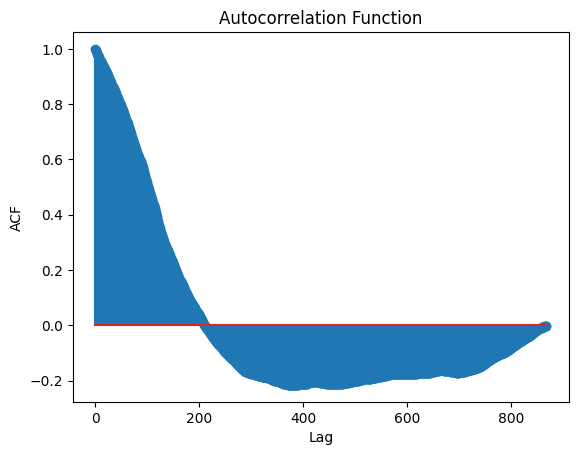

In [ ]:
# Tính toán ACF
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data['Price'], nlags= 1000
                           )

# Vẽ đồ thị ACF
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.show()

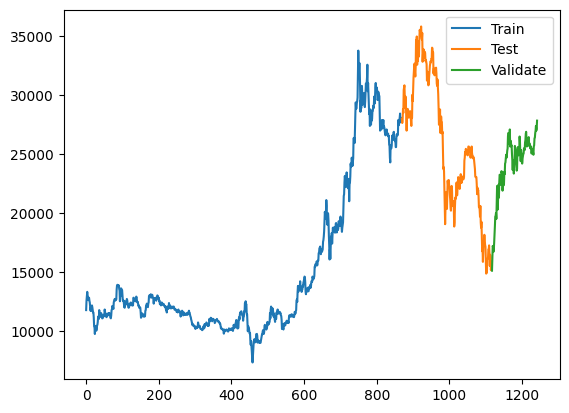

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index,val_data['Price'])
plt.legend(['Train', 'Test','Validate',])
plt.show()

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

feature = []
for price in train_data['High']:
  feature.append([price])
print(feature)
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
model = dlm(y_train)
model = model + trend(1, name='lineTrend', w=1.0)
model = model + autoReg(degree=3, data=y_train, name='ar1', w=1e7) + longSeason(period=8, stay=1, data=y_train, name='monthly', w=3.0) + dynamic(features=feature, discount=1, name='High')


[[12000], [12550], [13150], [13450], [13350], [13100], [12900], [12950], [12950], [12800], [12600], [12550], [11950], [12000], [12000], [12050], [12350], [12050], [12200], [11850], [11700], [11550], [11250], [10650], [10350], [10400], [10750], [10600], [10300], [10450], [10500], [10700], [10800], [11200], [11200], [11100], [11750], [11800], [11550], [11350], [11400], [11550], [11700], [11550], [11300], [11300], [11350], [11250], [11350], [11650], [11350], [11800], [11850], [11750], [11400], [11600], [11300], [11300], [11600], [11500], [11450], [11550], [11550], [11550], [11550], [11550], [11400], [11250], [11200], [11500], [11800], [11850], [12300], [12200], [12200], [12050], [12400], [12750], [12650], [12900], [12850], [12800], [12900], [12850], [13500], [14400], [14050], [14050], [13950], [14300], [13950], [13950], [13600], [13100], [13100], [13200], [13600], [13900], [13850], [13600], [13500], [12950], [12850], [12650], [12750], [12350], [12300], [12500], [12600], [12550], [12400], 

C:\Users\giangle\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydlm\modeler\autoReg.py:75: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


In [ ]:

model.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
# 4. Quá trình testing
x_test= []

for price in test_data['High']:
  x_test.append([price])
print(np.array(x_test).shape)
y_test = np.array(test_data['Price'])
y_pred = model.predictN(date = model.n-1, N=len(x_test),featureDict={'High': x_test})
y_pred = y_pred[0]

(248, 1)


In [ ]:

y_val = np.array(val_data['Price'])
x_val= []

for price in val_data['High']:
  x_val.append([price])
print(type(x_val))

size = test_size + val_size
y_pred_val = model.predictN(featureDict={'High': x_val}, N = len(x_val))
y_pred_val = y_pred_val[0]
print(y_pred_val)

<class 'list'>
[15338.75930950431, 21149.460628241934, 18660.08038742582, 21067.11407705578, 19322.788694886225, 20816.658734384127, 19986.380302978003, 20809.1635625329, 21166.962777656943, 21964.021721441233, 21804.631408484318, 22188.820051306644, 22837.054569934928, 22340.592117809887, 24040.11593271467, 23559.588654474675, 22271.56073623639, 23600.575787536724, 23817.175232368565, 23886.24754552833, 23788.638571787433, 24726.91203194227, 24452.474919379572, 24183.215336360547, 24536.741284940315, 23486.389096188508, 25320.94751329961, 24780.616305631982, 24713.905850517167, 24488.708780021352, 24051.753598897067, 24207.648214297194, 24152.23845811396, 24018.292873228238, 24954.732962862727, 25045.884223870195, 25195.786667948458, 25952.63377905264, 25528.051551616034, 26048.591961152204, 25949.692736390294, 25664.513262247478, 26253.099107152404, 26088.12471254833, 27174.28417700133, 26963.442969476386, 27296.849311042482, 27474.254333597688, 26773.61578423159, 27595.572298486113,

In [ ]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 1615.5318084456019
Testing RMSE: 2676.716427866575
Validation MAPE: 6.396139157086216
Testing MAPE: 10.204496005158166
Validation MAE: 1458.7442692216323
Testing MAE: 2159.655054810243


In [ ]:
# Dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['High'])


#test
x_test_ln = np.array(test_data.index).reshape(-1, 1)
y_test_ln = np.array(test_data['High'])
y_pred_ln = ln_model.predict(x_test_ln)

# Quá trình Validate
x_val_ln= np.array(val_data.index).reshape(-1, 1)
y_val_ln = np.array(val_data)
y_pred_val_ln =  ln_model.predict(x_val_ln)

# Predict the prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = ln_model.predict(feature_next_30_days)

print(feature_next_30_days)






[30540.21533525 30559.13137782 30578.0474204  30596.96346297
 30615.87950555 30634.79554812 30653.7115907  30672.62763328
 30691.54367585 30710.45971843 30729.375761   30748.29180358
 30767.20784615 30786.12388873 30805.0399313  30823.95597388
 30842.87201645 30861.78805903 30880.7041016  30899.62014418
 30918.53618675 30937.45222933 30956.3682719  30975.28431448
 30994.20035706 31013.11639963 31032.03244221 31050.94848478
 31069.86452736 31088.78056993]


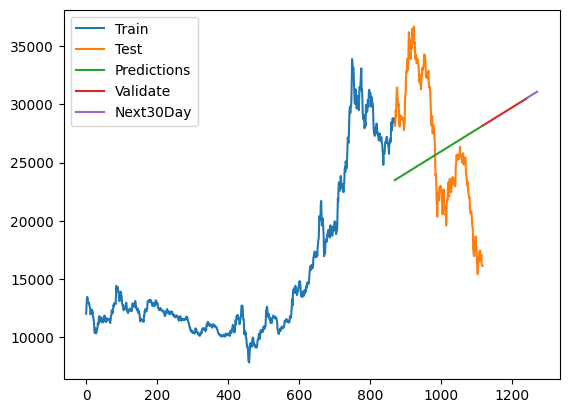

In [ ]:
plt.plot(train_data.index, train_data['High'])
plt.plot(test_data.index, test_data['High'])
plt.plot(test_data.index,y_pred_ln)
plt.plot(val_data.index,y_pred_val_ln)
plt.plot(last_data,feature_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x = []
for price in feature_next_30_days:
  x.append([price])
print(type(x))
num_dims = np.ndim(x)
print(num_dims)
y_next_30_days = model.predictN(featureDict={'High': x}, N = 30)
y_next_30_days = y_next_30_days[0]
print(y_next_30_days)


<class 'list'>
2
[29818.06700556824, 29136.412312090586, 29584.262535675065, 29304.63372386742, 29466.48861432099, 29377.48112020302, 29456.621570157073, 29407.687532861164, 29547.626565524784, 29561.534837604268, 29578.30134583023, 29599.63027906186, 29570.8551234289, 29604.507565184234, 29604.157624461943, 29606.516298465212, 29713.342226775792, 29748.635879874804, 29751.59368230911, 29781.839084245, 29747.306323629386, 29784.676577560665, 29781.92596411753, 29785.834806677078, 29891.659756479636, 29927.599763768223, 29930.140200838476, 29960.655104926347, 29925.948320742897, 29963.430945584787]


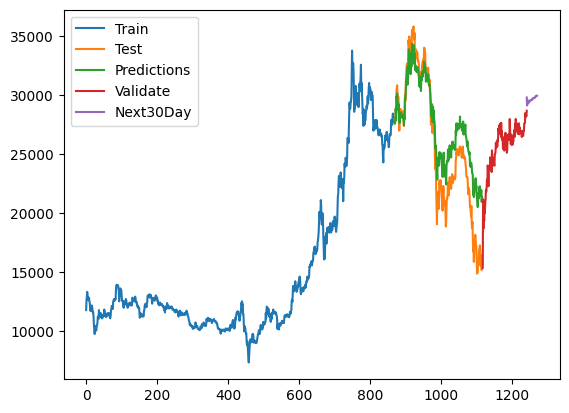

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index,y_pred)
plt.plot(val_data.index,y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()